# Import

In [49]:
import torch
import numpy 
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [30]:
%matplotlib inline

# Setup

In [3]:
os.chdir('../')

In [6]:
sys.path.append(os.getcwd())

In [7]:
sys.path

['C:\\Users\\ay011\\server-side\\julab\\h2m.sate\\Colab Notebooks',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\python310.zip',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\DLLs',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\lib',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate',
 '',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\lib\\site-packages',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\lib\\site-packages\\win32',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ay011\\anaconda3\\envs\\h2m.sate\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\ay011\\server-side\\julab\\h2m.sate']

In [110]:
path_obj_dat = 'data/training/objects_data'
path_obj_lab = 'data/training/objects_label'

In [111]:
path_road_dat = 'data/training/roads_data'
path_road_lab = 'data/training/roads_label'

# Func

In [99]:
def plot_image_from_output(img, annotation):
    img = (img-img.min())/(img.max()-img.min())*255
    img = img.astype(int)

    fig,ax = plt.subplots(1, figsize=(20,20))
    ax.imshow(img)
    
    for idx in range(len(annotation["bboxes"])):
        ymin, xmin, ymax, xmax = annotation["bboxes"][idx]
        # xmin, ymin, xmax, ymax = annotation["bboxes"][idx]
        if annotation['labels'][idx] == 1 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 2 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

# Data

## objects

In [113]:
object_data_list = os.listdir(path_obj_dat)

In [114]:
object_label_list = os.listdir(path_obj_lab)

In [121]:
idx = 0

In [122]:
obj_data = torch.load(f"{path_obj_dat}/{object_data_list[idx]}")[0]

In [123]:
obj_data = obj_data.detach().cpu().numpy().transpose([2,1,0])

In [124]:
obj_label = torch.load(f"{path_obj_lab}/{object_label_list[idx]}")[0]

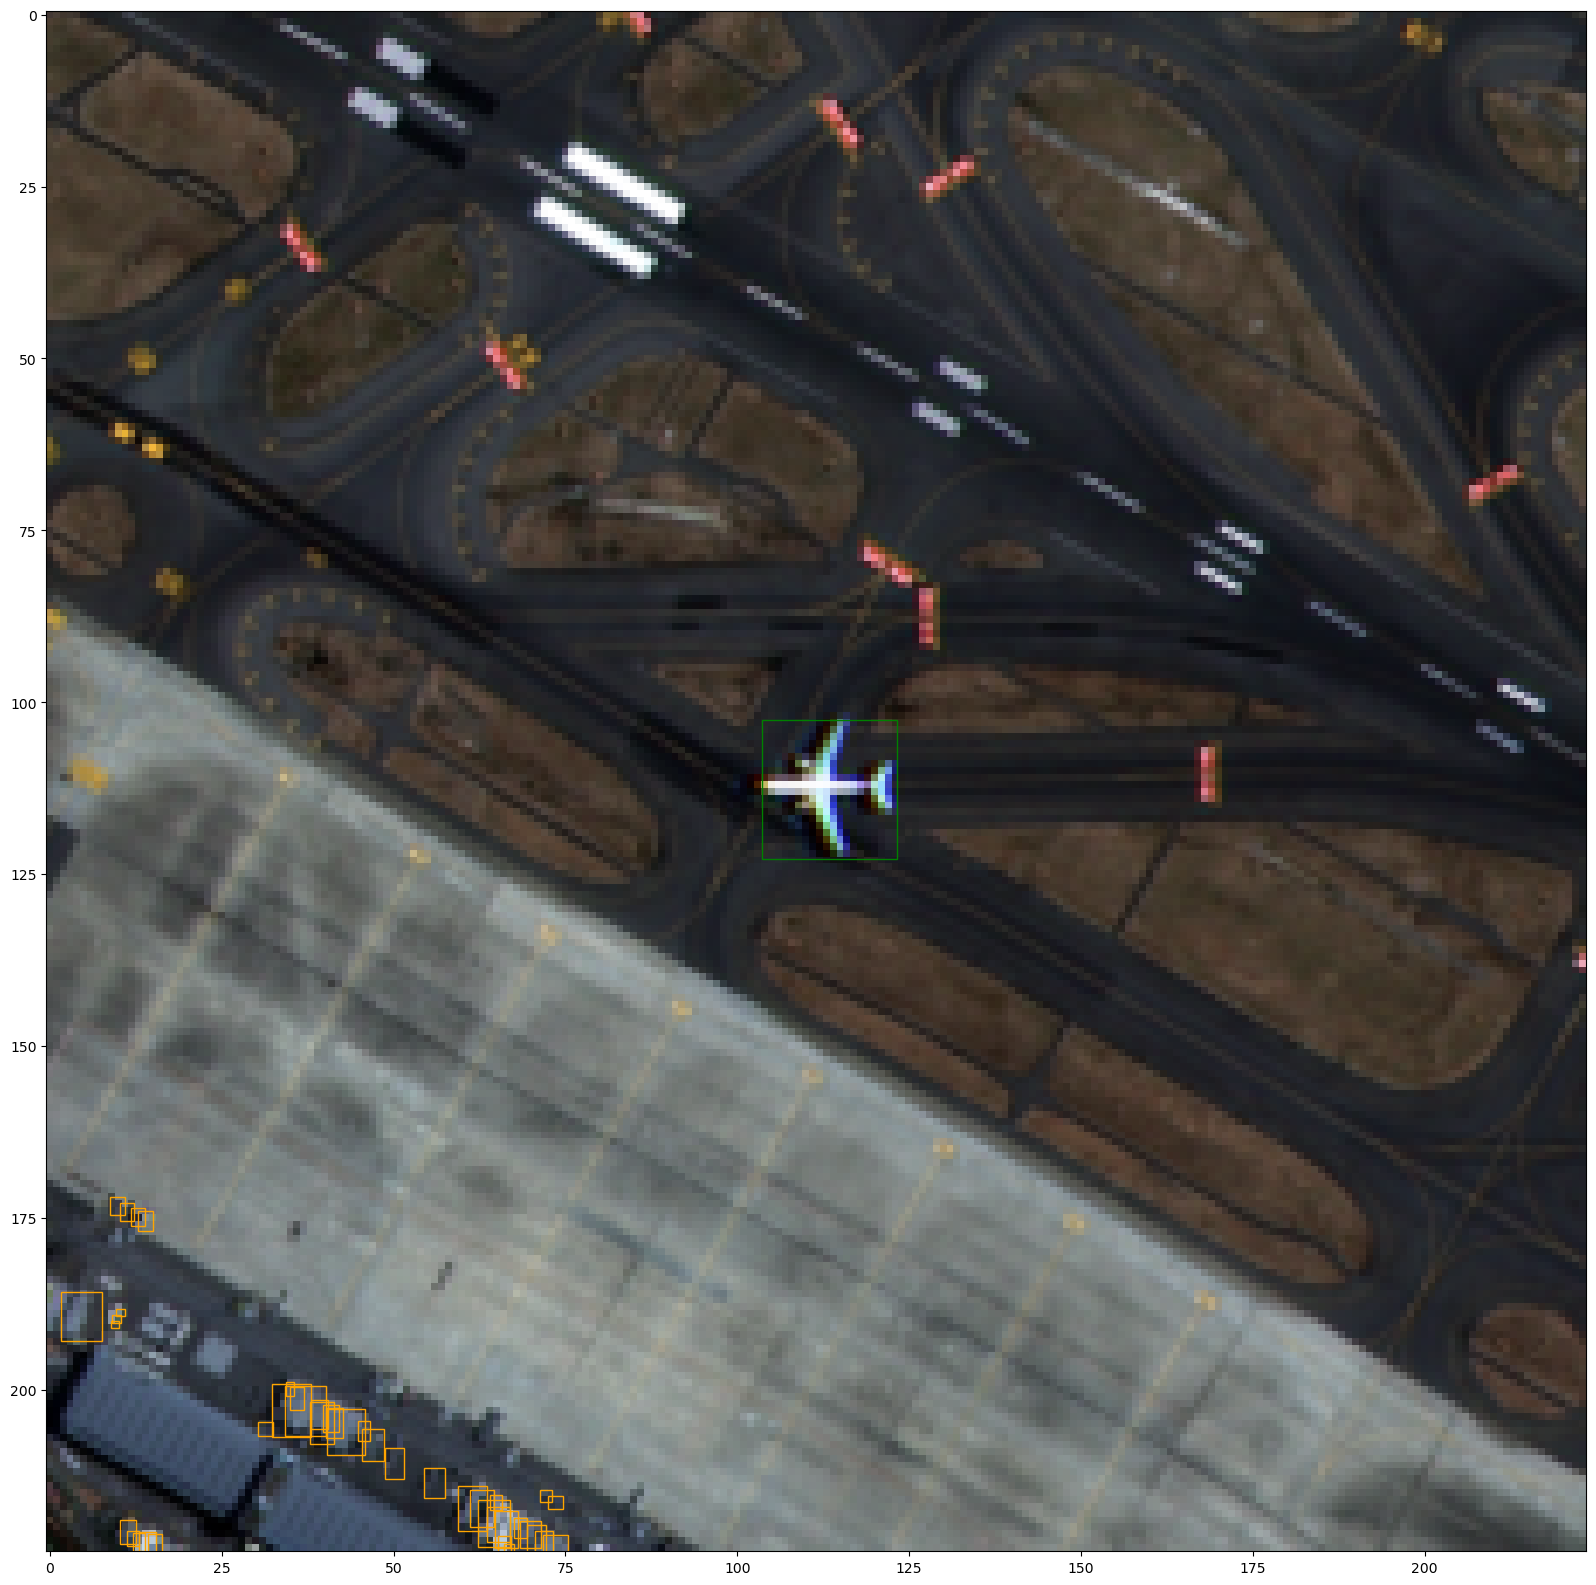

In [125]:
plot_image_from_output(obj_data, obj_label)

## Roads

In [147]:
road_data_list = os.listdir(path_road_dat)

In [148]:
road_label_list = os.listdir(path_road_lab)

In [149]:
road_data = torch.load(f"{path_road_dat}/{road_data_list[idx]}")[0]

In [150]:
road_data = road_data.detach().cpu().numpy().transpose([2,1,0])

In [156]:
road_label = torch.load(f"{path_road_lab}/{road_label_list[idx]}")[0]

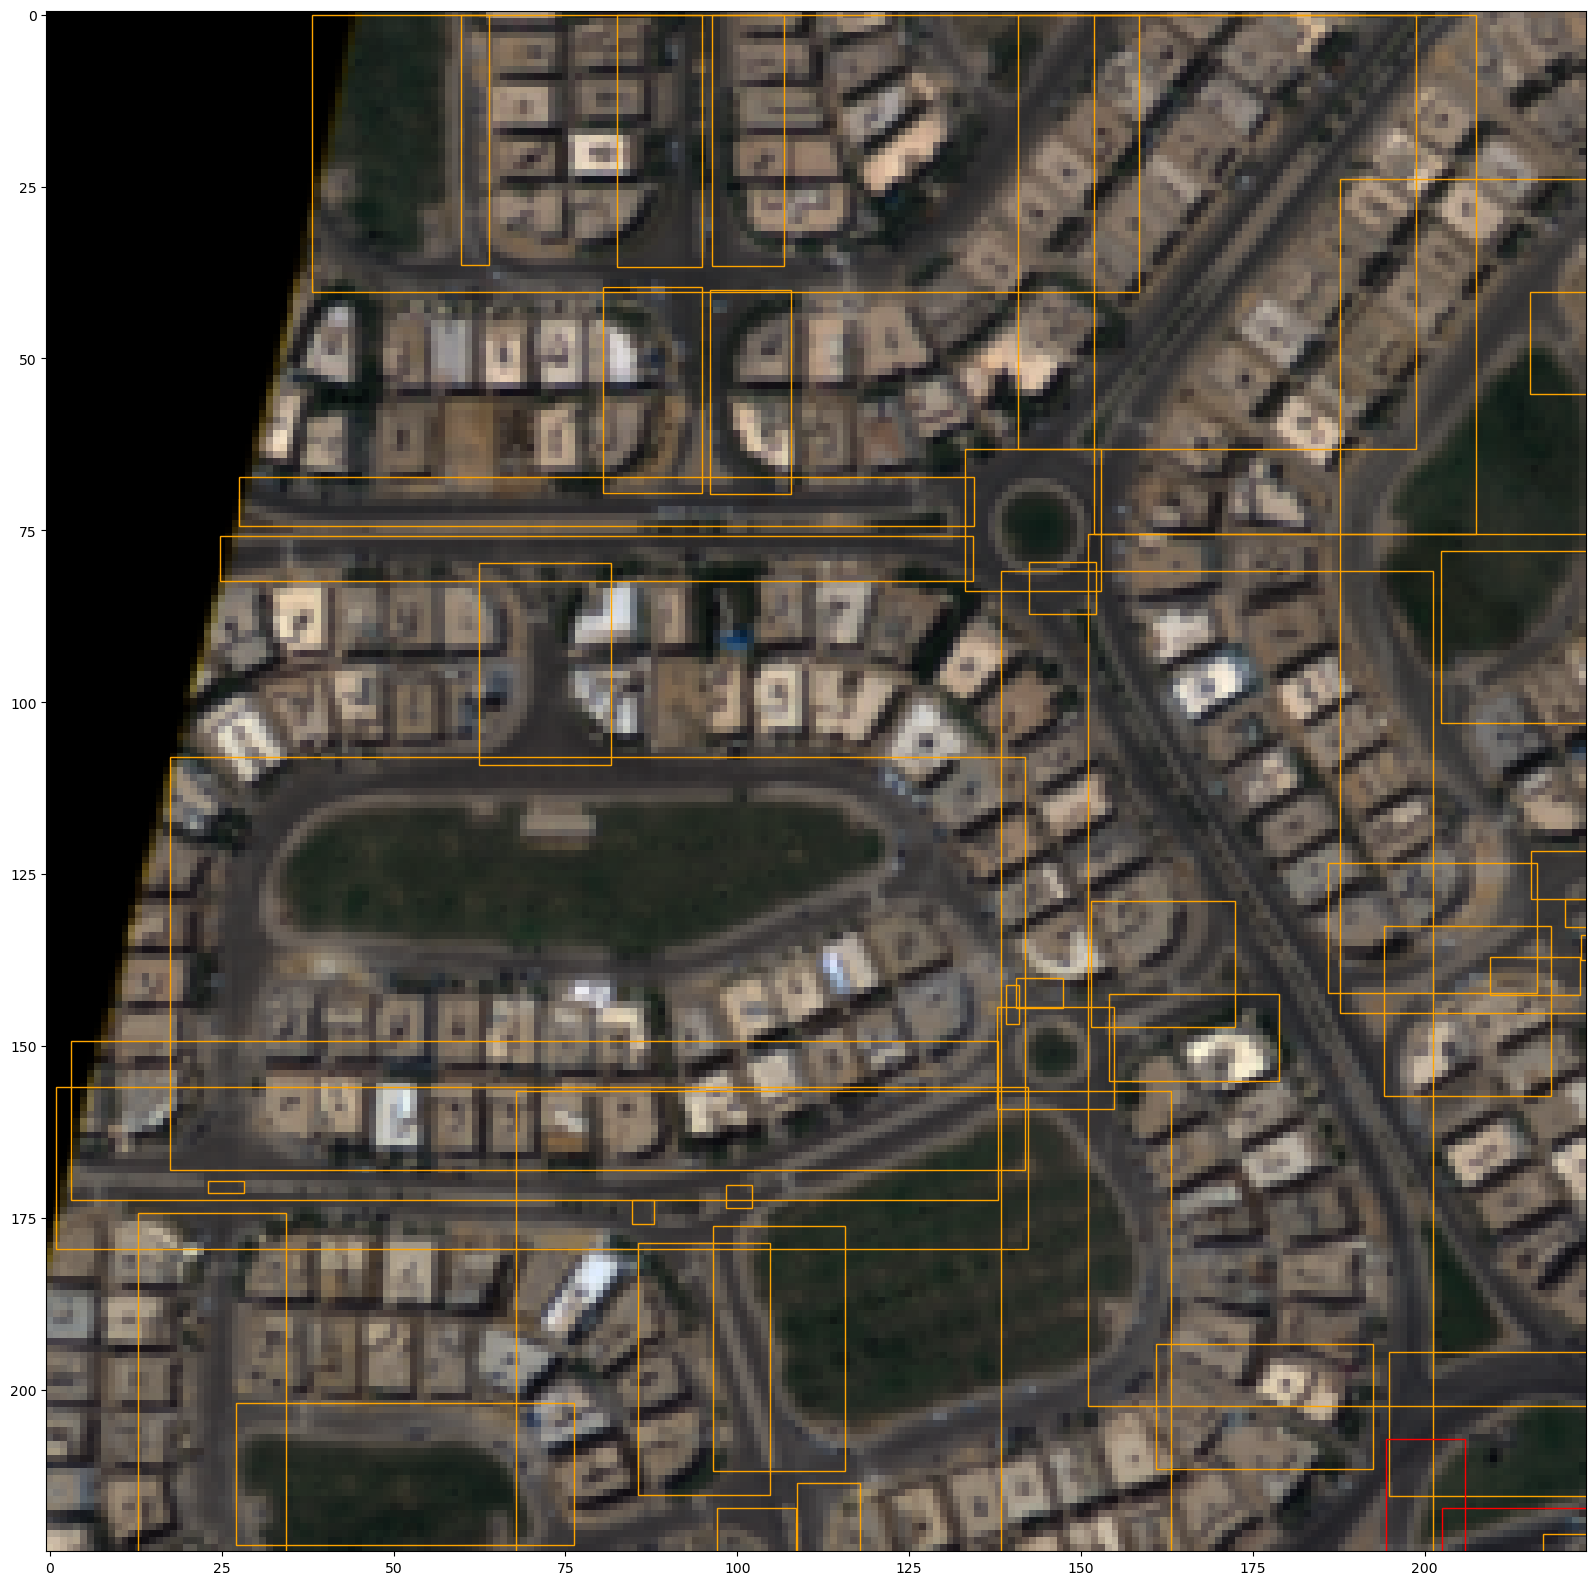

In [158]:
plot_image_from_output(road_data, road_label)